In [78]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import seaborn
import plotly
import matplotlib.pyplot as plt


In [16]:
df_eda = pd.read_csv('../data/sales_train.csv') 

In [17]:
df_eda.head(50)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [22]:
df_eda.shape

(2935849, 6)

In [18]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [24]:
df_eda.isnull().sum()


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [77]:
with pd.option_context('display.float_format', '{:.3f}'.format):
    print(df_eda[['item_price','item_cnt_day']].describe())

       item_price  item_cnt_day
count 2935849.000   2935849.000
mean      890.853         1.243
std      1729.800         2.619
min        -1.000       -22.000
25%       249.000         1.000
50%       399.000         1.000
75%       999.000         1.000
max    307980.000      2169.000


In [28]:
df_eda.duplicated().sum()

6

In [33]:
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%d.%m.%Y')

It’s worth taking a look at sales across different locations/stores over the entire time period.
Additionally, I’d like to understand how many items—regardless of category—were sold overall in different store locations. It seems that shop_id will carry the most weight among the features, based on the logic that each store is located in a unique place, and a store’s location generally correlates with the number of items sold per day.

Based on this, we can also create a feature representing the total number of items sold over all time in a store per day (preferably using the average or log-scaled value). To this, we can add the day of the week as it will also likely correlate with the number of items sold.

In [66]:
df_eda['shop_id'].value_counts().shape

(60,)

In [58]:
df_sorted = df_eda.sort_values('date')


In [59]:
df_sorted

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
49800,2013-01-01,0,18,5823,2500.0,1.0
29784,2013-01-01,0,27,5573,849.0,1.0
35476,2013-01-01,0,7,1006,399.0,1.0
8330,2013-01-01,0,19,17707,899.0,1.0
57384,2013-01-01,0,14,19548,149.0,1.0
...,...,...,...,...,...,...
2885098,2015-10-31,33,41,21386,169.0,1.0
2930981,2015-10-31,33,21,988,199.0,1.0
2885097,2015-10-31,33,41,21377,169.0,1.0
2930993,2015-10-31,33,22,10207,1199.0,1.0


In [34]:
monthly_sales = (
    df_eda.groupby(['date_block_num', 'shop_id', 'item_id'], as_index=False)
    .agg({'item_cnt_day': 'sum'})
    .rename(columns={'item_cnt_day': 'item_cnt_month'})
)

In [57]:
monthly_sales

,date_block_num,shop_id,item_id,item_cnt_month
0,0,0,32,6.0
1,0,0,33,3.0
2,0,0,35,1.0
3,0,0,43,1.0
4,0,0,51,2.0
...,...,...,...,...
1609119,33,59,22087,6.0
1609120,33,59,22088,2.0
1609121,33,59,22091,1.0
1609122,33,59,22100,1.0


In [80]:
shop_sales = df_eda.groupby(['shop_id'], as_index=False).agg({'item_cnt_day': 'sum'}) # Колличество всех проданных товаров в каждом из магазинов

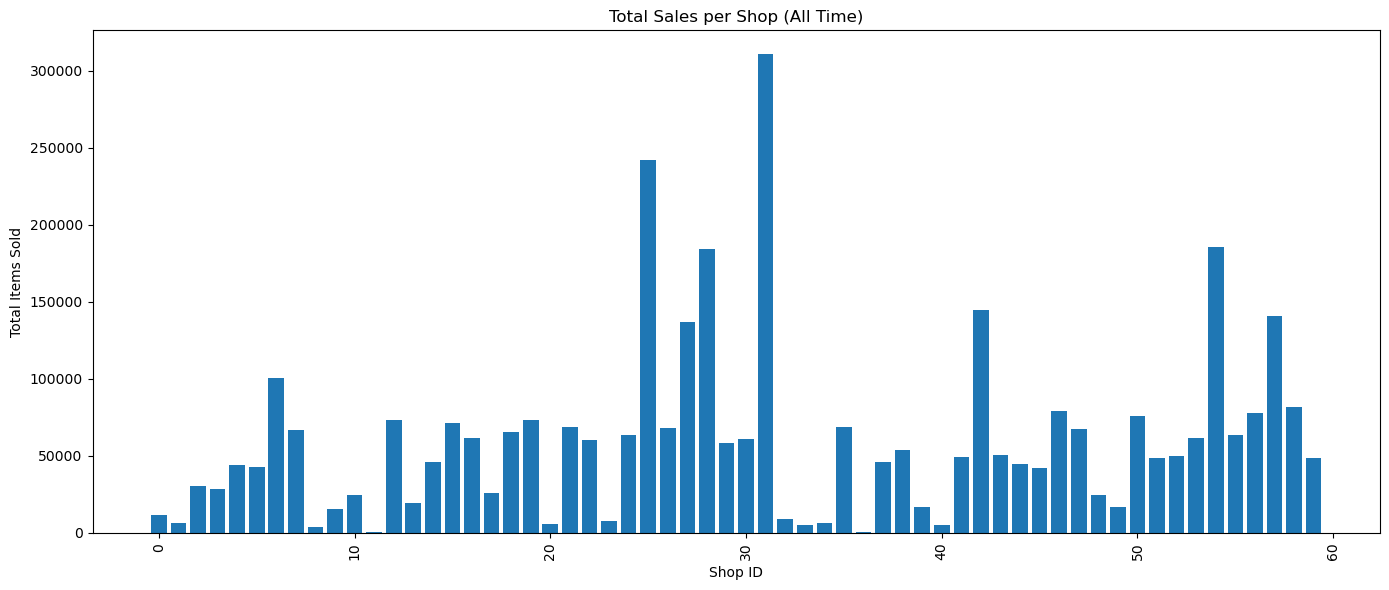

In [ ]:
plt.figure(figsize=(14, 6))
plt.bar(shop_sales['shop_id'], shop_sales['item_cnt_day'])
plt.xlabel('Shop ID')
plt.ylabel('Total Items Sold')
plt.title('Total Sales per Shop (All Time)')
plt.xticks(rotation=90)  
plt.tight_layout()
plt.show()

We can see that the number of stores with extremely low total sales is roughly equal to the number of stores with high total sales. Most store sales over the entire period fluctuate around an approximate average, with a deviation of about 15–30%.

Now it’s worth taking a look at what kinds of products are actually being sold.

In [86]:
items = pd.read_csv('../data/dicts/items.csv')

In [92]:
items[70:140].head(50)

,item_name,item_id,item_category_id
70,"101 совет начинающим разработчикам в системе ""...",70,49
71,11 ДРУЗЕЙ ОУШЕНА WB (BD),71,37
72,11 ДРУЗЕЙ ОУШЕНА WB (регион),72,40
73,11-11-11 (регион),73,40
74,12 ДРУЗЕЙ ОУШЕНА WB (BD),74,37
75,12 ДРУЗЕЙ ОУШЕНА WB (регион),75,40
76,12 ЛЕТ РАБСТВА (BD),76,37
77,12 ЛЕТ РАБСТВА (регион),77,40
78,12 МЕСЯЦЕВ,78,40
79,12 МЕСЯЦЕВ. НОВАЯ СКАЗКА,79,40


In [94]:
items_categories = pd.read_csv('../data/dicts/item_categories.csv')

In [99]:
items_categories.head(50)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
5,Аксессуары - PSVita,5
6,Аксессуары - XBOX 360,6
7,Аксессуары - XBOX ONE,7
8,Билеты (Цифра),8
9,Доставка товара,9


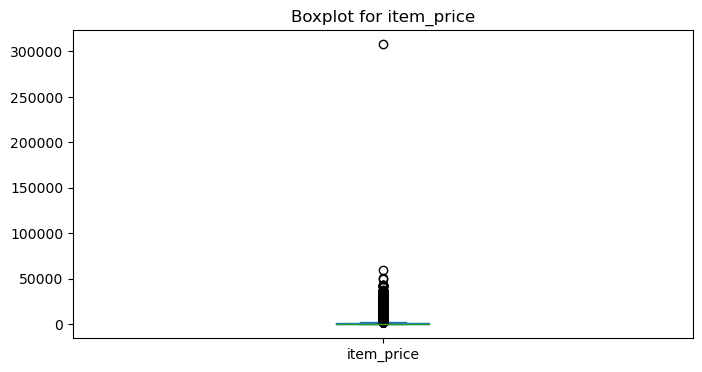

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df_eda['item_price'].plot.box()
plt.title('Boxplot for item_price')
plt.show()

In [113]:
shops = pd.read_csv('../data/dicts/shops.csv')

In [114]:
shops

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


### Draft

<Axes: >

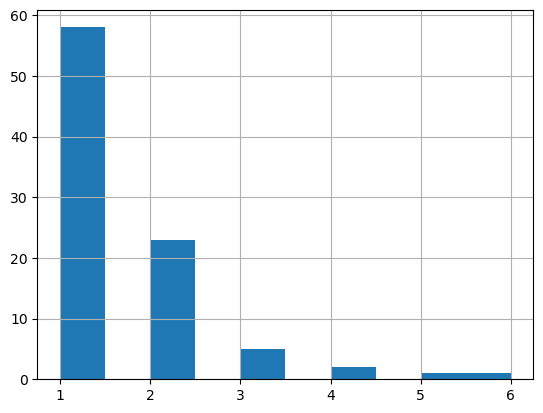

In [83]:
#df_eda['item_cnt_day'][df_eda['item_cnt_day'] > 100].value_counts().sort_index().plot(kind='bar', figsize=(20, 5))
df_eda['item_cnt_day'][df_eda['item_cnt_day'] > 100].value_counts().hist()